In [1]:
# !pip install easyocr
# !pip uninstall opencv-python-headless
# !pip install opencv-python-headless==4.1.2.30

In [4]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [32]:
import matplotlib.pyplot as plt
import cv2
import easyocr
from pylab import rcParams
rcParams['figure.figsize'] = 10, 60

In [7]:
url_image = 'labydamaro.camara.png'

In [8]:
reader = easyocr.Reader(['fr'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [10]:
model = reader.readtext(url_image)

In [11]:
len(model)

96

In [19]:
texte = ""
for i in range(len(model)):
    texte += model[i][1]
    

In [39]:
(x_min, y_min)=[min(c) for c in zip(*model[0][0])]
(x_max, y_max)=[max(c) for c in zip(*model[0][0])]

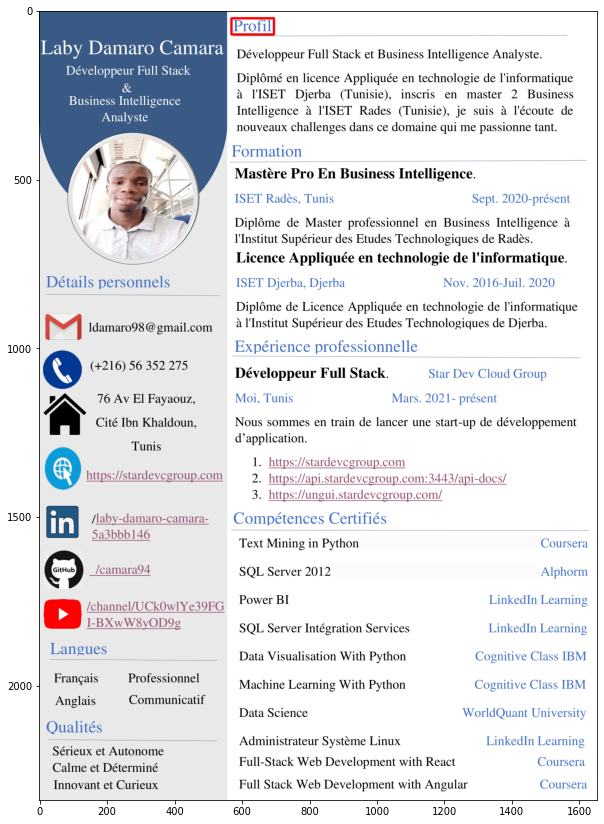

In [45]:
image = cv2.imread(url_image)
cv2.rectangle(image, (x_min, y_min), (x_max, y_max),(0, 0, 255), 5)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [62]:
sections = [
'Profil', 
'Formation', 
'Expérience professionnelle', 
'Compétences Certifiés',
'Détails personnels',
'Langues',
'Qualités'
]

In [68]:
coordonnees = [model[s][0] for s in range(len(model)) if model[s][1] in sections ]

[[[570, 24], [696, 24], [696, 72], [570, 72]],
 [[564, 394], [784, 394], [784, 444], [564, 444]],
 [[16, 780], [395, 780], [395, 836], [16, 836]],
 [[572, 965], [1131, 965], [1131, 1028], [572, 1028]],
 [[570, 1476], [1041, 1476], [1041, 1539], [570, 1539]],
 [[26, 1867], [208, 1867], [208, 1923], [26, 1923]],
 [[18, 2098], [196, 2098], [196, 2152], [18, 2152]]]

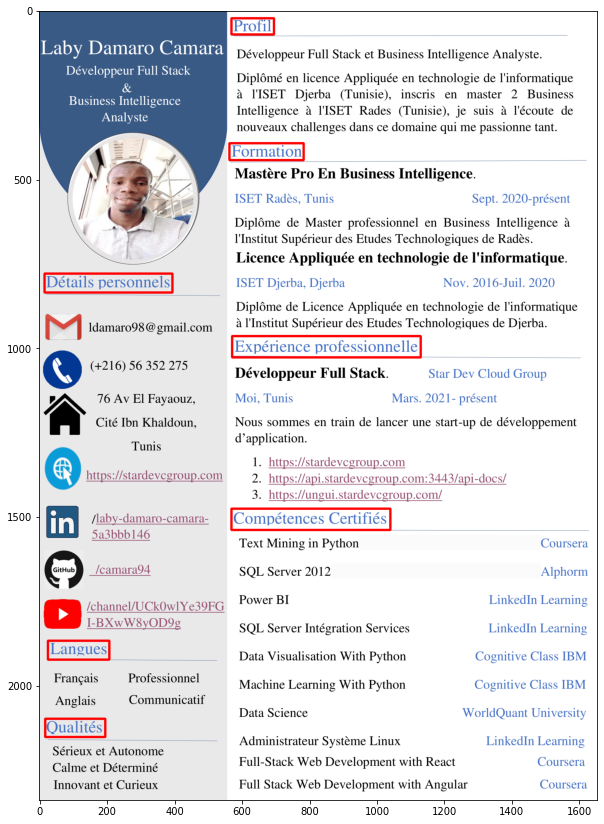

In [70]:
image = cv2.imread(url_image)
for coord in coordonnees: 
    (x_min_2, y_min_2)=[min(c) for c in zip(*coord)]
    (x_max_2, y_max_2)=[max(c) for c in zip(*coord)]
    cv2.rectangle(image, (x_min_2, y_min_2), (x_max_2, y_max_2),(0, 0, 255), 5)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [125]:
cv2.imwrite('monCV.png',image)

True

In [71]:
texte

"ProfilLaby Damaro Camara `Développeur Full Stack et Business Intelligence Analyste.Développeur Full StackDiplômé en licence Appliquée en technologie de linformatiqueàI'ISETDjerba(Tunisie),inscrisenmaster2BusinessBusiness IntelligenceIntelligenceà I'ISETRades   (Tunisie), jesuisà l'écoutedeAnalystenouveauxchallenges dans ce domainemepassionne tant.FormationMastère Pro En Business Intelligence.ISET Radès, TunisSept. 2020-présentDiplômede Master professionnelen Business   IntelligenceàV'Institut Supérieur des Etudes Technologiques de Radès .Licence Appliquée en technologie de l'informatique.Détails personnelsISET Djerba, DjerbaNov. 2016-Juil. 2020Diplôme de Licence Appliquée en technologie de linformatiqueIdamaro98 @gmail.comà lInstitut Supérieur des Etudes Technologiques de Djerba.Expérience professionnelle(+216) 56 352 275Développeur Full Stack .Star Dev Cloud Group76 Av El Fayaouz;,Moi, TunisMars. 2021- présentCité Ibn Khaldoun;Nous sommes en train de lancer une start-up dedéveloppeme

In [72]:
import re

In [120]:
pattern = "(\(\+\d{3}\) |\(\d{5}\)?)*(\d{2} ?(\d{3} ?){2})"
tel = re.findall(pattern, texte)

In [121]:
tel

[('(+216) ', '56 352 275', '275')]